# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import pickle as pkl
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, # Convolutional Layer
    MaxPooling2D, # Pooling Layer
    Dropout, # To prevent the nEural nets from Overfitting
    Flatten, # Flattening the matrix -> 2D -> 1D
    Dense, # Connected Neural Networks
    Activation, # Activation Function
    BatchNormalization # Feature Scaling
)
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#Image Properties


In [ ]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

#Make train and test df while Importing the data sets


In [ ]:
filenames=os.listdir("/content/drive/MyDrive/Project 2 Dataset/Cat-and-dogs/train")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [ ]:
filenames=os.listdir("/content/drive/MyDrive/Project 2 Dataset/Cat-and-dogs/test")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
test_df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [ ]:
test_df['category'].nunique()

1

#Make the model


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

#Creating Training and Validation DataFrame

In [ ]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=32

In [ ]:
test_df

,filename,category
0,9090.jpg,0
1,9089.jpg,0
2,9102.jpg,0
3,910.jpg,0
4,9094.jpg,0
...,...,...
12495,10435.jpg,0
12496,10442.jpg,0
12497,10440.jpg,0
12498,10437.jpg,0


In [ ]:
test_path = '/content/drive/MyDrive/Project 2 Dataset/Cat-and-dogs/test'

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "/content/drive/MyDrive/Project 2 Dataset/Cat-and-dogs/train",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/MyDrive/Project 2 Dataset/Cat-and-dogs/train", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)


Found 20040 validated image filenames belonging to 2 classes.
Found 5010 validated image filenames belonging to 2 classes.


#Took 10 Epochs for getting sufficient accuracy  

In [ ]:
history = model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
157/157 [==============================] - 1546s 10s/step - loss: 0.6994 - accuracy: 0.6603 - val_loss: 1.5984 - val_accuracy: 0.4992
Epoch 2/10
157/157 [==============================] - 1503s 10s/step - loss: 0.5342 - accuracy: 0.7363 - val_loss: 1.8083 - val_accuracy: 0.5108
Epoch 3/10
157/157 [==============================] - 1515s 10s/step - loss: 0.4706 - accuracy: 0.7795 - val_loss: 1.0864 - val_accuracy: 0.5980
Epoch 4/10
157/157 [==============================] - 1513s 10s/step - loss: 0.4259 - accuracy: 0.8023 - val_loss: 0.5727 - val_accuracy: 0.7739
Epoch 5/10
157/157 [==============================] - 1502s 10s/step - loss: 0.4006 - accuracy: 0.8199 - val_loss: 0.5034 - val_accuracy: 0.7737
Epoch 6/10
157/157 [==============================] - 1492s 10s/step - loss: 0.3705 - accuracy: 0.8364 - val_loss: 0.4095 - val_accuracy: 0.8285
Epoch 7/10
157/157 [==============================] - 1504s 10s/step - loss: 0.3545 - accuracy: 0.8428 - val_loss: 0.3754 - val_ac

In [ ]:
model.save("my_model.h5", include_optimizer=True)

#Saved pickled file as CNN_Model.pkl

In [ ]:
filename = 'CNN_Model.pkl'
pkl.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......batch_normalization_1
.........vars
............0
............1
............2
............3
......batch_normalization_2
.........vars
............0
............1
............2
............3
......batch_normalization_3
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
...

In [ ]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
types=['Cat','Dog','None']


#Testing with Real Data

In [ ]:
file_path = os.listdir('/content/drive/MyDrive/Project 2 Dataset/Cat-and-dogs/test')

In [ ]:
image_path = "/content/drive/MyDrive/Project 2 Dataset/Cat-and-dogs/test/10.jpg" # path of the image
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 128, 128, 3) # reshape for prediction
result = model.predict(img)
if result[0][0] >= 0.5:
  responce='Cat'
  probability=(result[0][0])*100
  if probability<90:
    responce='none'
else:
  responce='Dog'
  probability=1-result[0][0]
  probabilty=probability*100
  if probability<90:
    prediction='none'
print('The input image is classified as ',responce,' predicted with ',probability,"% probability")

1/1 [==============================] - 0s 43ms/step
The input image is classified as  Cat  predicted with  99.8308777809143 % probability


In [ ]:
image_path = "/content/drive/MyDrive/random.jpeg" # path of the image
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 128, 128, 3) # reshape for prediction
result = model.predict(img)
if result[0][0] >= 0.5:
  responce='dog'
  probability=(result[0][0])*100
  if probability<90:
    responce='none'
else:
  responce='cat'
  probability=1-result[0][0]
  probabilty=probability*100
  if probability<90:
    prediction='none'
print('The input image is classified as ',responce,' predicted with ',probability,"% probability")



1/1 [==============================] - 0s 69ms/step
The input image is classified as  none  predicted with  79.90318536758423 % probability


In [ ]:
image_path = "/content/drive/MyDrive/Project 2 Dataset/Cat-and-dogs/test/18.jpg" # path of the image
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 128, 128, 3) # reshape for prediction
result = model.predict(img)
if result[0][0] >= 0.5:
  responce='Cat'
  probability=(result[0][0])*100
  if probability<90:
    responce='none'
else:
  responce='Dog'
  probability=1-result[0][0]
  probabilty=probability*100
  if probability<90:
    prediction='none'
print('The input image is classified as ',responce,' predicted with ',probability,"% probability")

1/1 [==============================] - 0s 46ms/step
The input image is classified as  Dog  predicted with  0.9977545994333923 % probability


#Accuracy and Evaluation Metrics


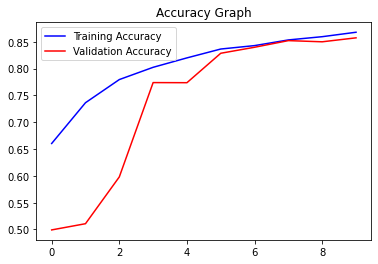

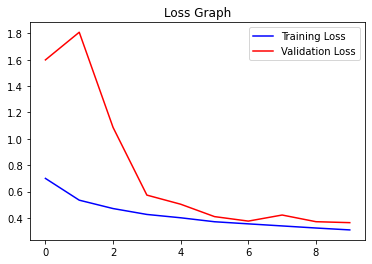

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
#0.8677 accuracy after 10 epochs and 0.8573 Validation accuracy

In [ ]:
#  The metric specified here is 'accuracy', which calculates the mean accuracy rate across all predictions.
# In this context, accuracy refers to the fraction of correctly classified samples out of the total number of samples.
# It’s a common metric used to evaluate the performance of classification models.